## Final Project Submission

Please fill out:
* Student name: Leticia D Fernandes
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Abhineet
* Blog post URL:


In [1]:
import sqlite3
import pandas as pd
import csv
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('data/kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
data.drop(
    labels=['date','yr_renovated','zipcode','sqft_above','sqft_basement',
           'sqft_living15','sqft_lot15','long','lat','view'],
    axis=1,
    inplace=True)

In [5]:
data.fillna(0, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   sqft_living  21597 non-null  int64  
 5   sqft_lot     21597 non-null  int64  
 6   floors       21597 non-null  float64
 7   waterfront   21597 non-null  float64
 8   condition    21597 non-null  int64  
 9   grade        21597 non-null  int64  
 10  yr_built     21597 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 1.8 MB


* Understading the data and I started to prepared it for analysis.

In [6]:
sample_size = data.sample(frac=.3,random_state=1)
t_data= data.drop(sample_size.index)

In [7]:
water = pd.get_dummies(t_data.waterfront,prefix='water',drop_first=True)

In [8]:
t_data['water'] = water
t_data.drop(labels='waterfront', axis=1,inplace=True)
t_data

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,water
0,7129300520,221900.0,3,1.00,1180,5650,1.0,3,7,1955,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,3,7,1951,0
2,5631500400,180000.0,2,1.00,770,10000,1.0,3,6,1933,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,5,7,1965,0
8,2414600126,229500.0,3,1.00,1780,7470,1.0,3,7,1960,0
...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,3,8,2009,0
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,3,8,2014,0
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,3,7,2009,0
21595,291310100,400000.0,3,2.50,1600,2388,2.0,3,8,2004,0


* Dummying and Sampling the data

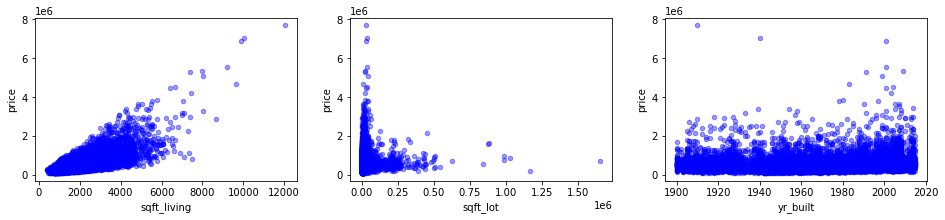

In [9]:
fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(16,3))

for xcol, ax in zip([
    'sqft_living', 'sqft_lot', 'yr_built'], axes):
    t_data.plot(
        kind='scatter', x=xcol, y='price',ax=ax, alpha=0.4, color='b')

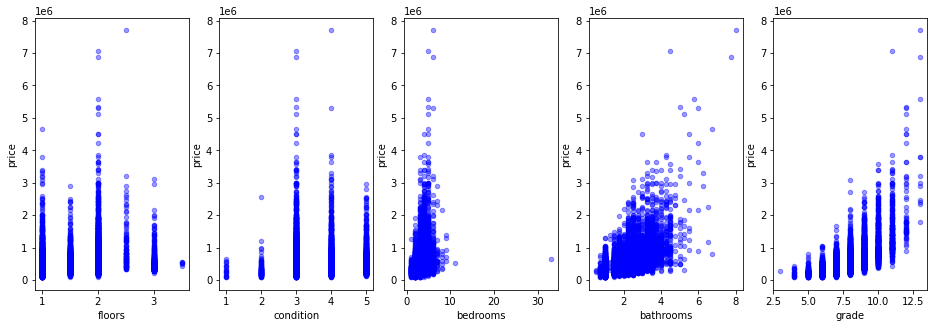

In [10]:
fig, axes = plt.subplots(nrows=1,ncols=5, figsize=(16,5))

for xcol, ax in zip([
    'floors', 'condition', 'bedrooms', 'bathrooms','grade'], axes):
    t_data.plot(
        kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

* I am cleaning up the data and modeling it.
By plotting I could identify 3 categorical variables so far: floors, condition, grade
I also was able to find some outliers

In [11]:
t_data.bedrooms.value_counts()

3     6856
4     4822
2     1928
5     1131
6      202
1      139
7       25
8        8
9        5
33       1
11       1
Name: bedrooms, dtype: int64

In [12]:
t_data = t_data.drop(data[data.bedrooms==33].index)

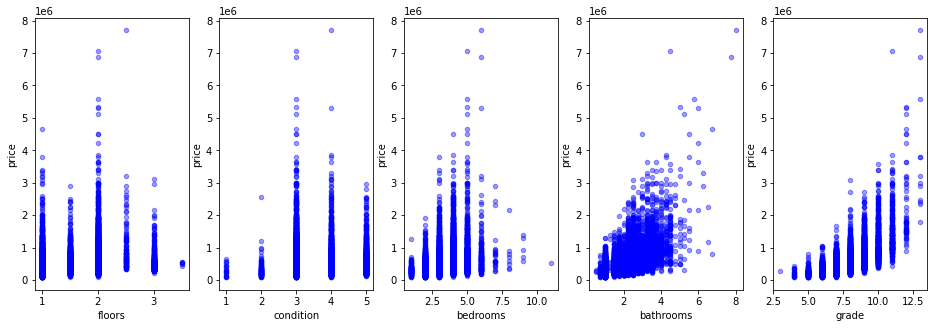

In [13]:
fig, axes = plt.subplots(nrows=1,ncols=5, figsize=(16,5))

for xcol, ax in zip([
    'floors', 'condition', 'bedrooms','bathrooms','grade'
], axes):
    t_data.plot(kind='scatter', x=xcol, y='price', ax=ax,
                alpha=0.4, color='b')

* After plotting could I identify an outlier on number of bedrooms. It has been dropped from the analysis.

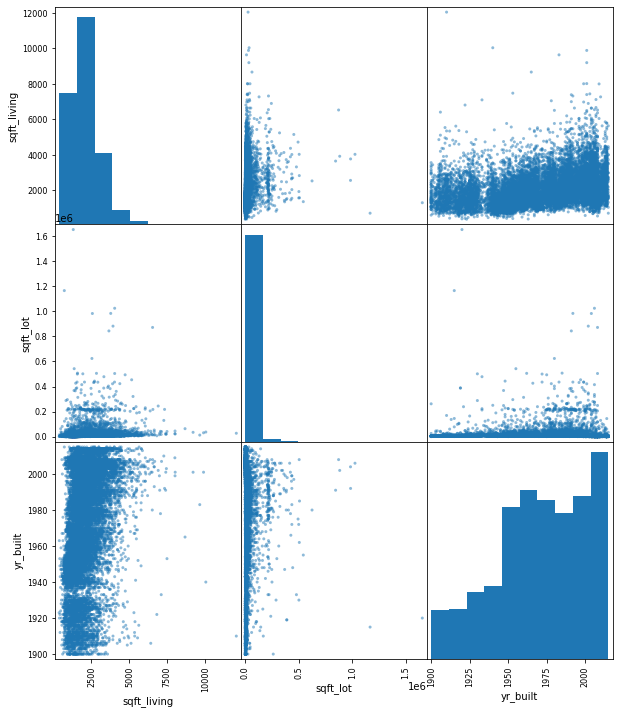

In [14]:
pd.plotting.scatter_matrix(t_data[
    ['sqft_living', 'sqft_lot', 'yr_built']],figsize=(10,12));

In [15]:
data = data.drop(t_data[t_data.sqft_lot>600000].index)

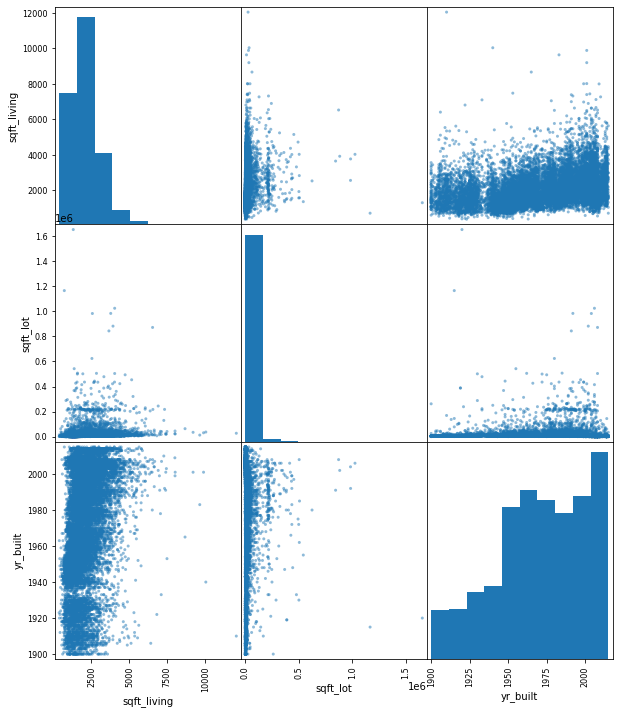

In [16]:
pd.plotting.scatter_matrix(t_data[
    ['sqft_living', 'sqft_lot', 'yr_built']],figsize=(10,12));

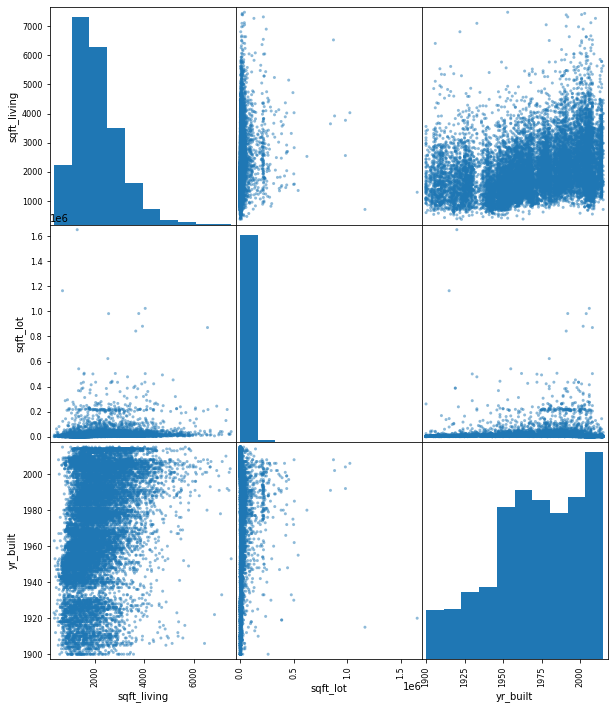

In [17]:
t_data = t_data.drop(t_data[t_data.sqft_living>7500].index)
pd.plotting.scatter_matrix(t_data[
    ['sqft_living', 'sqft_lot', 'yr_built']],figsize=(10,12));

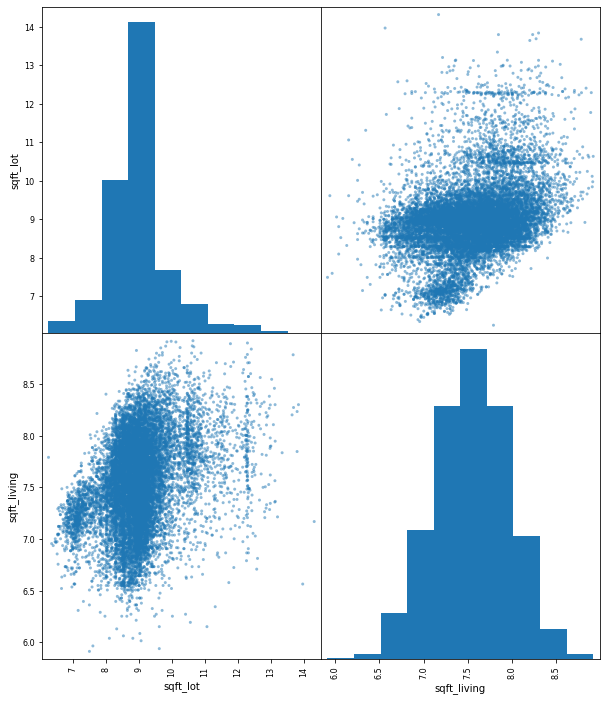

In [18]:
non_normal = ['sqft_lot','sqft_living']
for feat in non_normal:
    t_data[feat] = t_data[feat].map(lambda x: np.log(x))
pd.plotting.scatter_matrix(t_data[non_normal], figsize=(10,12));